# Gradients and backpropagation

###  To understand a gradient, imagine you are standing on the top of a mountain in a vast mountain range. Your goal is to get to the lowest altitude point on the mountain range. How might you do this? Well, you might start by trying to go downhill as fast as possible. It would be nice to know where this point is, however. The gradient is essentially this. When you calculate a gradient in the context of machine learning, you are helping the model find the map to the lowest point in the moutain range (in this case, the mountain range is the loss function which we will cover in the next notebook). The gradient (or gradient vector) points in the direction of the steepest slope *uphill* releative to where you are currently standing.  However, we want to reduce our error (get to a lower point on the mountain), so we go in the opposite direction of this gradient, effectively moving downhill.

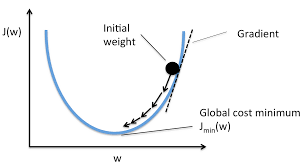

### When thinking of a feedforward neural network (the most basic type), think of information moving in two directions, from input to output (foreward pass), and then from output to input (backwards pass, or backpropagation). The forward pass generates the predictions from our neural network, and backpropagation does the heavy lifting to make it better (aka, the model 'learns')

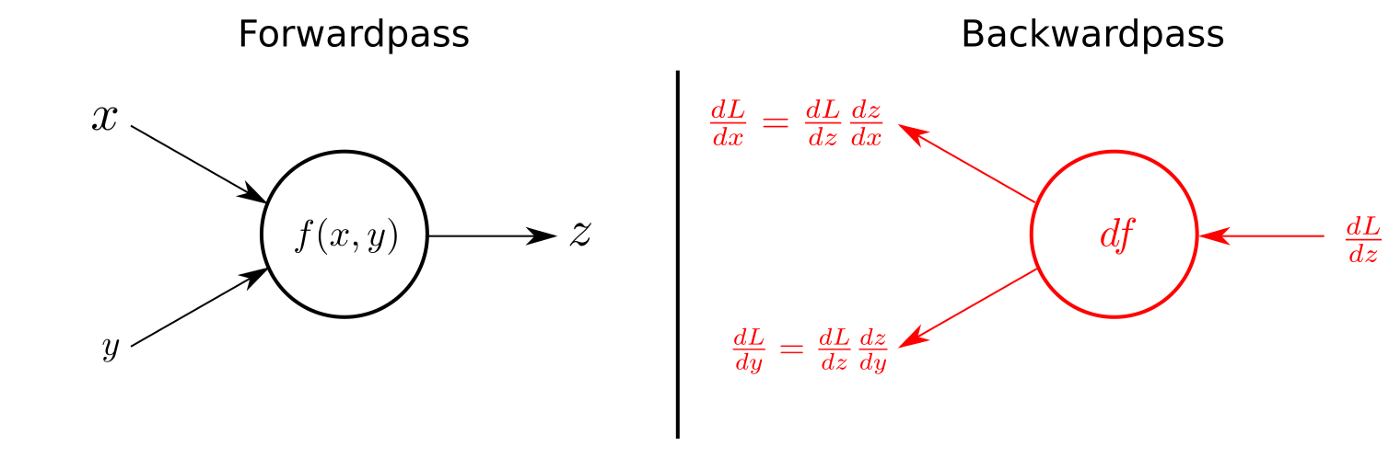

### Backpropagation is the process by which we adjust the weights and biases (the " tuning knobs") of our neural network to improve its accuracy. The accuracy of a neural network is determined by these weights and biases, which adjust the input/output relationship of the nodes in the network. During backpropagation, we calculate the gradients (the same gradients from the earlier paragraph) of the loss function (for now, just think of the loss function as the thing that measures how far off our predictions are from real values) with respect to the weights and biases, using the chain rule from calculus. These gradients tell us how much a small change in each weight or bias would affect the overall error of the network. We then update the weights and biases in the direction that minimizes the error. In this way, we "turn the knobs" to reduce the error and make the network's predictions more accurate. 

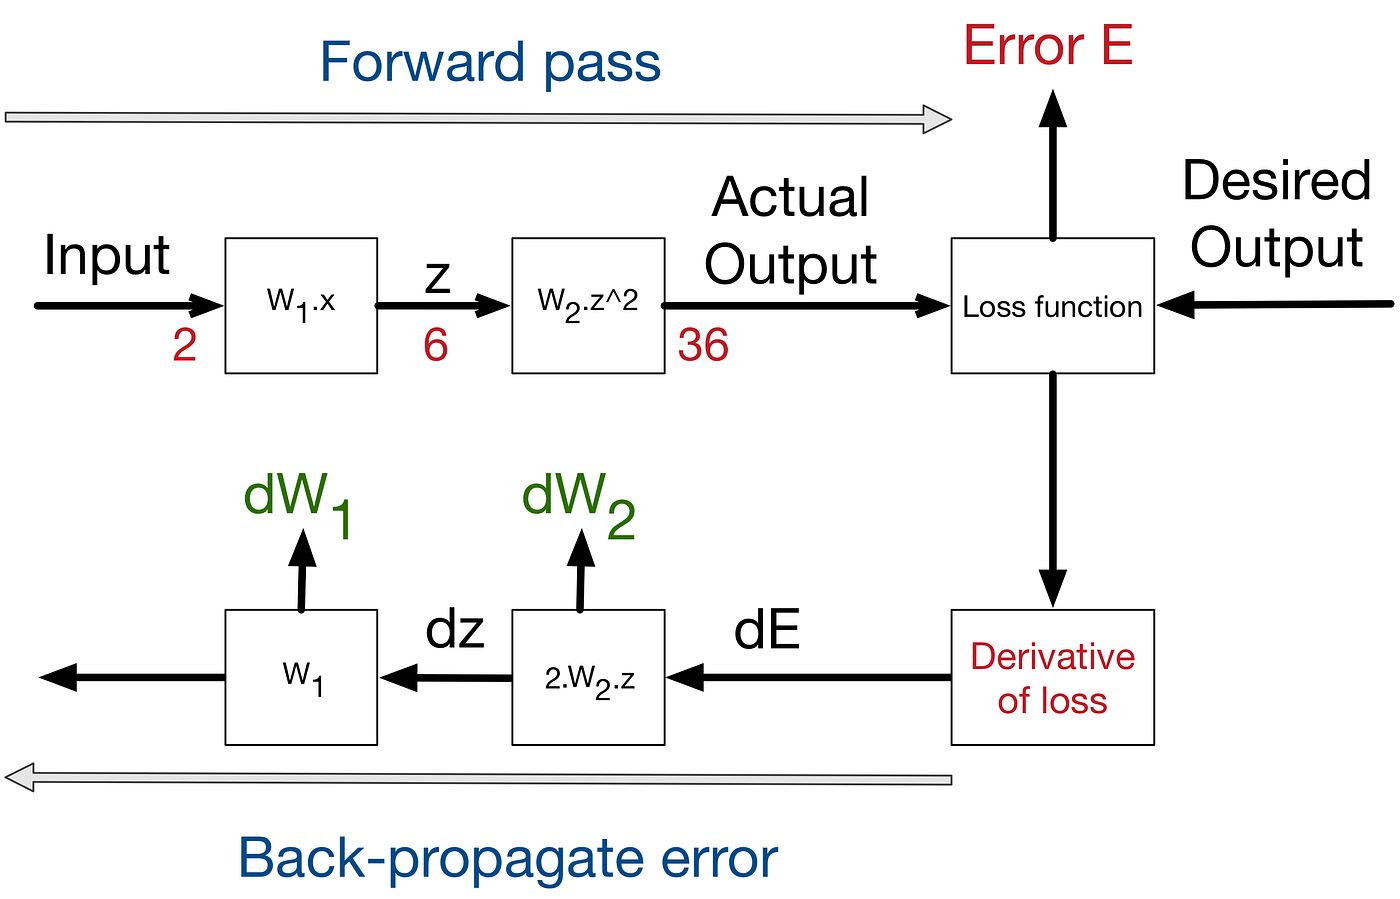

### To be honest, this all doesnt make sense until you see the whole process in action. So just go through this notebook to get familiar with how to calculate gradients and get an understanding of backpropagation, and then quickly proceed to the the next notebook to start to tie things together with loss functions and optimization.

In [ ]:
# Import torch
import torch

# Ensure that tensors are created with tracking gradients
# requires_grad is an argument which tells pytorch we need to be tracking gradients for these vectors. 
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)



### Lets define a quadratic function to illustrate the point. Think of 'z' as the loss function (mountainous landscape) that we want to minimize, and 'x' and 'y' as weights (knobs) that we want to modify in order to minimize our loss function.

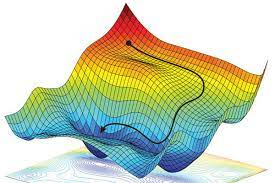

### For this example, minimizing our loss function simply means finding the values of 'x' and 'y' that make 'z' as small as possible.  This is is not a practical demonstration, but a way to introduce the concept and calculations of gradients and backpropagation.


In [ ]:
# Define a simple quadratic function
z = 3 * (x ** 2) + 2 * y + 5 # can read this as z = 3x^2 +2y + 5
print(z)


### First, lets try to print the gradient of z with respect to x and y


In [ ]:

print("Gradients of z with respect to x: ", x.grad) 
print("Gradients of z with respect to y: ", y.grad)

### Nothing. That is because we need to calculate it and the computer only does what we tell it when we tell it... for now...

### Lets compute the gradient for z using the backwards method from PyTorch. We pass to backward a ones_like tensor of x (because x is a 1x3 tensor, the tensor looks like [1,1,1]), and what this essentially does is tell PyTorch to consider each element in z equally when calculating gradients. This can be a bit confusing at first so don't worry if it doesnt make sense initially. It will come with practice

In [ ]:
# Compute gradients
z.backward(torch.ones_like(x)) # because x and y are tensors with 3 elements in it, z is also a tensor with 3 elements in it
                               # The argument we pass into z.backward is essentially telling PyTorch to treat each element of z equally when calculating gradients

# Now that we calculated the gradients, we can print the gradients z with respect to x and y
# dont let this notation scare you. If you remember from calculus, when you used to do derivatives you would calculate a derivative with respect to soemthing.
# Backpropagation is just a fancy system of derivtives, so thats all this means
print("Gradients of z with respect to x: ", x.grad) 
print("Gradients of z with respect to y: ", y.grad)

### If you are asking yourself, "what do these gradients mean?" that's okay. It is super confusing at first. To put it simply, the gradients of z with respect to x and y give us the direction and rate at which 'z' changes if we slightly change 'x' or 'y'. The sign of the gradient tells us the direction, and the magnitude tells us how fast it changes. Remember, in the context of neural networks, 'z' can be thought of as the error or loss, and 'x' and 'y' can be thought of as the parameters or weights we're trying to optimize. So, the gradients tell us in which direction we should change our parameters to minimize the loss. 

### But how do we use these gradients to actually update the parameters? That's where optimization algorithms like Gradient Descent come in. In the next notebook, we will be using the gradients we calculated to actually minimize a real loss function using an optimizer. Keep pushing!